In [289]:
path = 'data/case_6.nrdd'

import itk
import matplotlib.pyplot as plt
import itkwidgets

PixelType = itk.F
images_1 = itk.imread("./data/case6_gre1.nrrd", PixelType)
images_2 = itk.imread("./data/case6_gre2.nrrd", PixelType)
recalage = itk.imread("./translation.nrrd", PixelType)

# Segmentation

In [290]:
images_2_resampled = recalage.astype(float)
images_2_resampled = itk.image_from_array(images_2_resampled)

In [291]:
cast_filter = itk.CastImageFilter[images_2_resampled, itk.Image[itk.F, 3]].New()
cast_filter.SetInput(images_2_resampled)
cast_filter.Update()

images_2_resampled = cast_filter.GetOutput()

In [292]:
smoothing = itk.CurvatureFlowImageFilter.New(Input=images_1)
smoothing.SetNumberOfIterations(5)
smoothing.SetTimeStep(0.125)
smoothing.Update()

images_1_smoothed = smoothing.GetOutput()

smoothing = itk.CurvatureFlowImageFilter.New(Input=images_2_resampled)
smoothing.SetNumberOfIterations(5)
smoothing.SetTimeStep(0.125)
smoothing.Update()

images_2_smoothed = smoothing.GetOutput()

images_1_smoothed.shape, images_2_smoothed.shape

((176, 256, 256), (176, 256, 256))

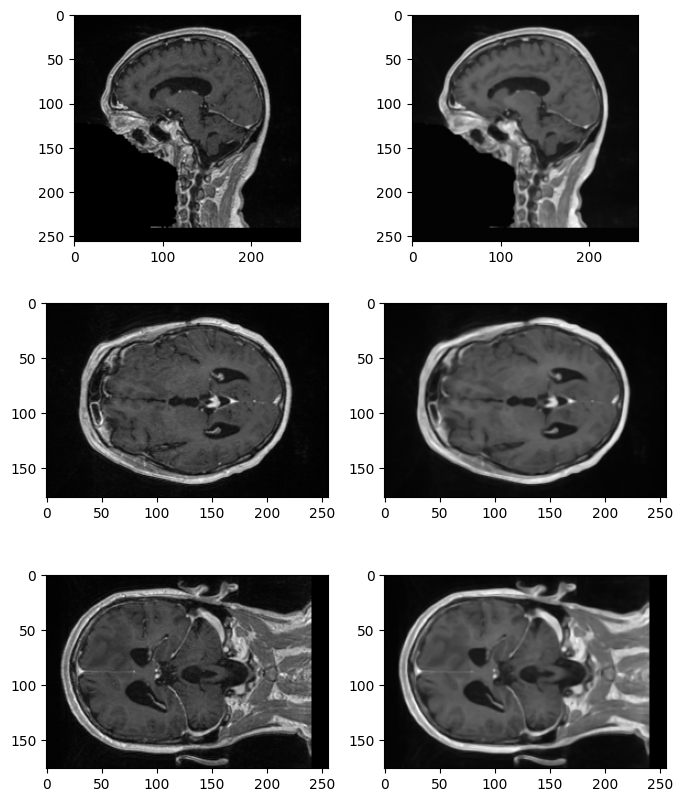

In [293]:
fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes[0, 0].imshow(images_2_resampled[100, :, :], cmap='gray')
axes[0, 1].imshow(images_2_smoothed[100, :, :], cmap='gray')
axes[1, 0].imshow(images_2_resampled[:, 100, :], cmap='gray')
axes[1, 1].imshow(images_2_smoothed[:, 100, :], cmap='gray')
axes[2, 0].imshow(images_2_resampled[:, :, 150], cmap='gray')
axes[2, 1].imshow(images_2_smoothed[:, :, 150], cmap='gray')

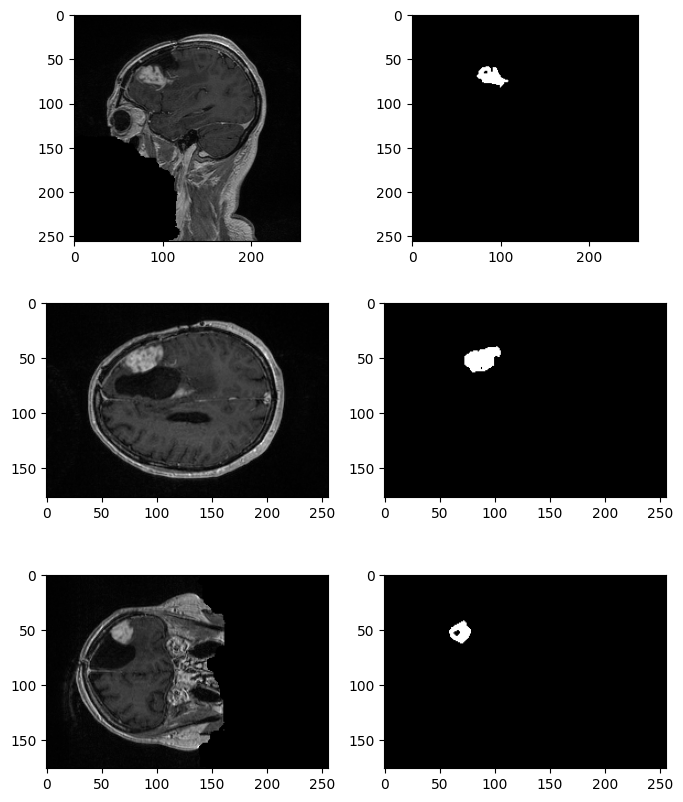

In [294]:
ConnectedFilterType = itk.ConnectedThresholdImageFilter[itk.Image[itk.F,3], itk.Image[itk.F,3]]
connectedThreshold = ConnectedFilterType.New()

lower_threshold = 500.
upper_threshold = 800.
index = (90,70,51)

connectedThreshold.SetInput(images_1_smoothed)
connectedThreshold.SetLower(lower_threshold)
connectedThreshold.SetUpper(upper_threshold)
connectedThreshold.SetReplaceValue(255)


connectedThreshold.SetSeed(index)
seed_value = images_1_smoothed.GetPixel(index)

connectedThreshold.Update()

images_1_segmented = connectedThreshold.GetOutput()

fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes[0, 0].imshow(images_1[index[0] - 35, :, :], cmap='gray')
axes[0, 1].imshow(images_1_segmented[index[0] - 35, :, :], cmap='gray')
axes[1, 0].imshow(images_1[:, index[1], :], cmap='gray')
axes[1, 1].imshow(images_1_segmented[:, index[1], :], cmap='gray')
axes[2, 0].imshow(images_1[:, :, index[2] + 30], cmap='gray')
axes[2, 1].imshow(images_1_segmented[:, :, index[2] + 30], cmap='gray')

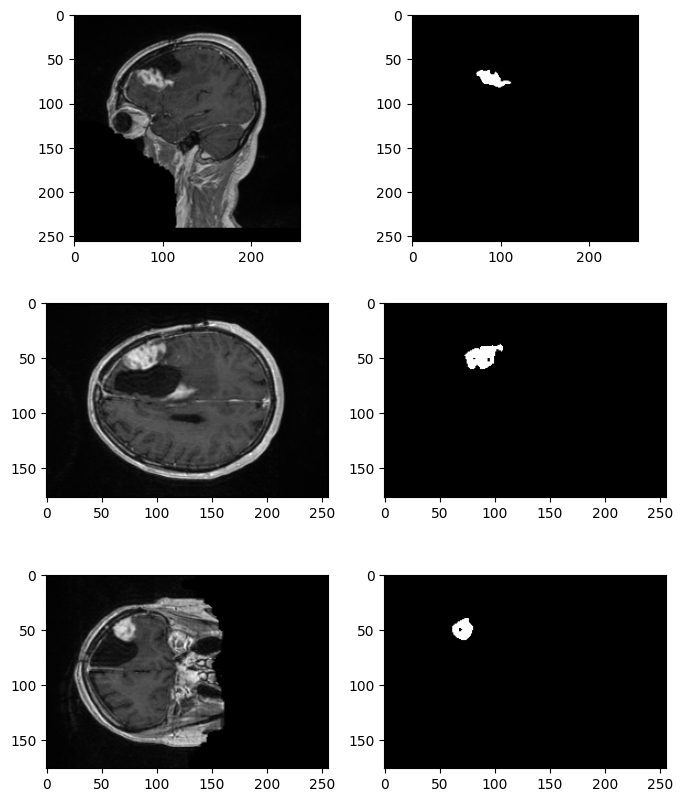

In [295]:
ConnectedFilterType = itk.ConnectedThresholdImageFilter[itk.Image[itk.F,3], itk.Image[itk.F,3]]
connectedThreshold = ConnectedFilterType.New()

lower_threshold = 500.
upper_threshold = 800.
index = (90,70,51)

connectedThreshold.SetInput(images_2_smoothed)
connectedThreshold.SetLower(lower_threshold)
connectedThreshold.SetUpper(upper_threshold)
connectedThreshold.SetReplaceValue(255)

connectedThreshold.SetSeed(index)
seed_value = images_2_smoothed.GetPixel(index)

connectedThreshold.Update()

images_2_segmented = connectedThreshold.GetOutput()

fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes[0, 0].imshow(images_2_resampled[index[0] - 35, :, :], cmap='gray')
axes[0, 1].imshow(images_2_segmented[index[0] - 35, :, :], cmap='gray')
axes[1, 0].imshow(images_2_resampled[:, index[1], :], cmap='gray')
axes[1, 1].imshow(images_2_segmented[:, index[1], :], cmap='gray')
axes[2, 0].imshow(images_2_resampled[:, :, index[2] + 30], cmap='gray')
axes[2, 1].imshow(images_2_segmented[:, :, index[2] + 30], cmap='gray')